<img style="float: right;" src="https://cdn.bulbagarden.net/upload/f/f2/279Pelipper.png" width="150" height="150" />
# Project - Pelipper Delivery Service - Part 2

This Project is to create a Data Warehouse for the Pelipper Delivery Service. It contains five dimension tables: Items (Products), Trainers (Customers), Flyers (Sales Reps/Delivery), Towns (Locations) and Dates. They are all linked together in a Fact Table called Fct_Orders.

The Pelipper Delivery Service is essentially Pokemon Amazon. Instead of trainers having to go to certain towns or cities to buy items, they are flown (shipped) to them based on where they are in the Pokemon World. No need to go through the traffic or inconvience of retail, the Pelipper Delivery Service is designed to make buying items as simple as possible.

All queries are written for the year 2005.

In [3]:
# Import all Libraries, connect to SQL Server and set Seaborn Graph style to White Grid
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
import pandas as pd
import pyodbc

conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=localhost;"
                      "Database=Pokemon;"
                      "Trusted_Connection=yes;")
cursor = conn.cursor()

sns.set_style('whitegrid')

The image below is a Database Diagram of the Dimension and Fact Tables. Each Dimension table has a Primary Key that links to a Foreign Key at the Fact Table. This makes it simple to update and add new values to the Dimension Tables without causing errors to the actual data. Also, it allows us to query the data simply for making Graphs and Business Intelligence dashboards (more in the future!)

![my_image](files/PDS.png)

In [4]:
# Basic Query that we can run just by joining all the Tables Together
df = pd.read_sql_query('''
SELECT
	Trainers.trainer_name,
	Trainers.trainer_type,
	Items.item_name,
	Items.item_price,
	Towns.town_name,
	Flyers.flyer_name,
	Flyers.flyer_pokemon,
	Dates.date,
	Dates.quarter,
	qty,
	Items.item_price * qty AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [pokemon].[dbo].Dim_Flyers As Flyers
ON Orders.flyer_id = Flyers.flyer_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
ORDER BY Dates.date
''', conn)

df.head()

,trainer_name,trainer_type,item_name,item_price,town_name,flyer_name,flyer_pokemon,date,quarter,qty,Money Spent
0,Marcus,Fighter,Poke Ball,200,Pallet Town,Gargoyal,Fearow,2000-01-01,1,2.0,400.0
1,Max,Sailor,Max Repel,700,Lavender Town,Enforcer,Pidgeotto,2000-01-01,1,3.0,2100.0
2,Sarah,Swimmer,Max Repel,700,Cinnabar Island,Atlas,Swellow,2000-01-02,1,3.0,2100.0
3,Will,Elite Four,X Attack,500,Lavender Town,Cataphract,Pelipper,2000-01-03,1,1.0,500.0
4,Sarah,Swimmer,Potion,300,Lavender Town,Kit Fox,Altaria,2000-01-03,1,2.0,600.0


(array([       0.,  1000000.,  2000000.,  3000000.,  4000000.,  5000000.,
         6000000.,  7000000.,  8000000.,  9000000.]),
 <a list of 10 Text yticklabel objects>)

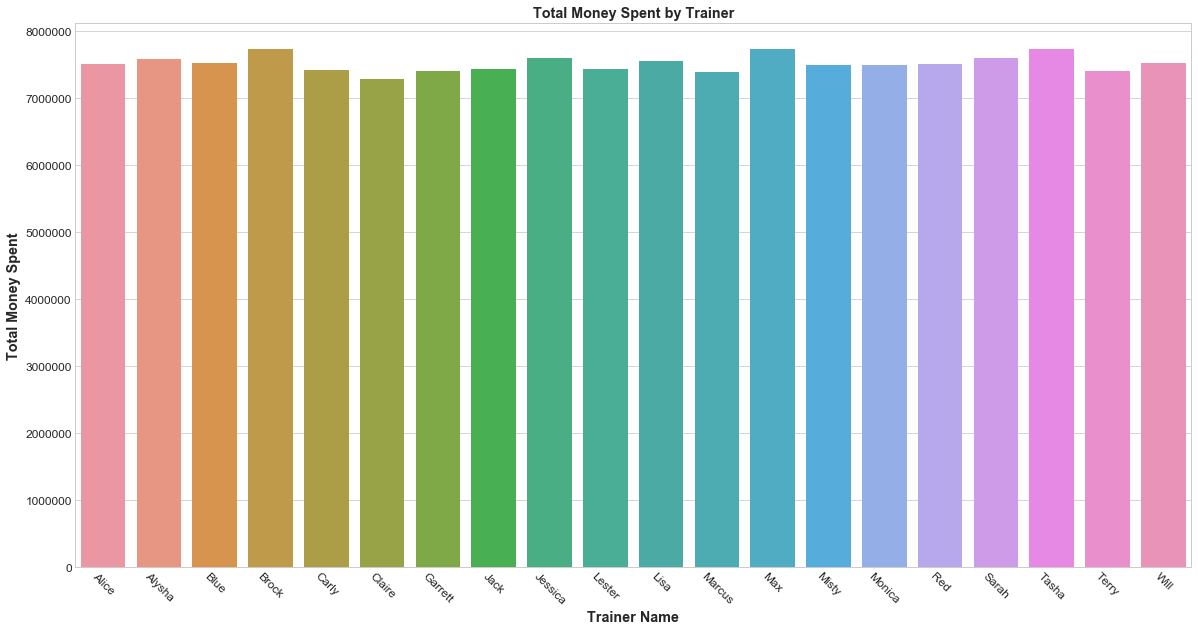

In [6]:
# Query by Total Spent by Trainer
df = pd.read_sql_query('''
SELECT
	Trainers.trainer_name,
	SUM(Items.item_price * qty) AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
GROUP BY trainer_name
ORDER BY trainer_name
''', conn)

# Bar Graph of Trainer's Total Money Spent
plt.figure(figsize = (20, 10))
sns.barplot(x = 'trainer_name', y = 'Money Spent', data = df)

# Title, x-axis, y-axis
plt.title('Total Money Spent by Trainer', size = 'x-large', fontweight = 'bold')
plt.xlabel('Trainer Name', size = 'x-large', fontweight = 'bold')
plt.ylabel('Total Money Spent', size = 'x-large', fontweight = 'bold')

# Rotate x-axis ticks
plt.xticks(rotation = -45, size = 'large')
plt.yticks(size = 'large')

(array([ -500000.,        0.,   500000.,  1000000.,  1500000.,  2000000.,
         2500000.,  3000000.,  3500000.,  4000000.]),
 <a list of 10 Text yticklabel objects>)

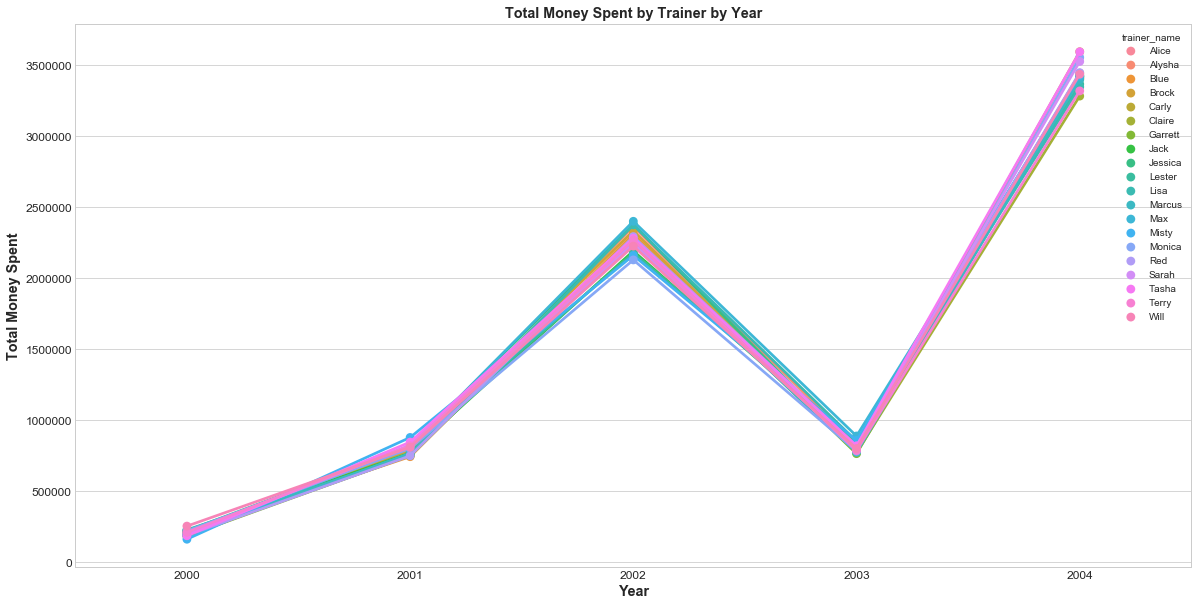

In [12]:
# Query for money spent per year by Trainer
df = pd.read_sql_query('''
SELECT
	Trainers.trainer_name,
	Dates.year,
	SUM(Items.item_price * qty) AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [pokemon].[dbo].Dim_Flyers As Flyers
ON Orders.flyer_id = Flyers.flyer_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
GROUP BY trainer_name, Dates.year
ORDER BY Dates.year, trainer_name
''', conn)

# Line Graph of Trainer's Total Money Spent
plt.figure(figsize = (20, 10))
ax = sns.pointplot(x = "year", y = "Money Spent", hue = "trainer_name",
                   data = df)

# Title, x-axis, y-axis
plt.title('Total Money Spent by Trainer by Year', size = 'x-large', fontweight = 'bold')
plt.xlabel('Year', size = 'x-large', fontweight = 'bold')
plt.ylabel('Total Money Spent', size = 'x-large', fontweight = 'bold')

# Ticks larger
plt.xticks(size = 'large')
plt.yticks(size = 'large')

(array([        0.,   2000000.,   4000000.,   6000000.,   8000000.,
         10000000.,  12000000.,  14000000.]),
 <a list of 8 Text yticklabel objects>)

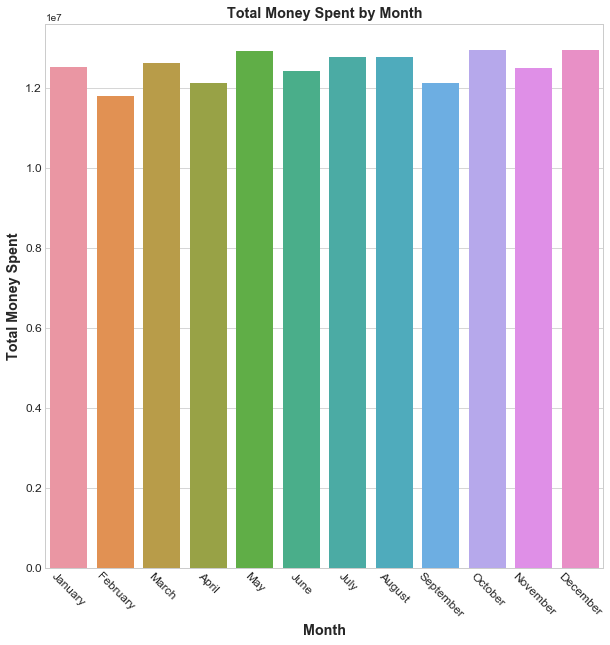

In [13]:
# Query by Money Spent per Month
df = pd.read_sql_query('''
SELECT
	Dates.Month,
	SUM(Items.item_price * qty) AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
GROUP BY Dates.Month
ORDER BY Dates.Month
''', conn)

# Bar Graph of Sums using Seaborn/Matplotlib
plt.figure(figsize = (10, 10))
sns.barplot(x = 'Month', y = 'Money Spent', data = df)

# Title, x-axis, y-axis
plt.title('Total Money Spent by Month', size = 'x-large', fontweight = 'bold')
plt.xlabel('Month', size = 'x-large', fontweight = 'bold')
plt.ylabel('Total Money Spent', size = 'x-large', fontweight = 'bold')

# Rename x-axis; Rotate ticks
x = [0,1,2,3,4,5,6,7,8,9,10,11]
years_xticks = ['January','February','March','April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(x, years_xticks, rotation = -45, size = 'large')
plt.yticks(size = 'large')

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.,  6000000.,  7000000.]),
 <a list of 9 Text yticklabel objects>)

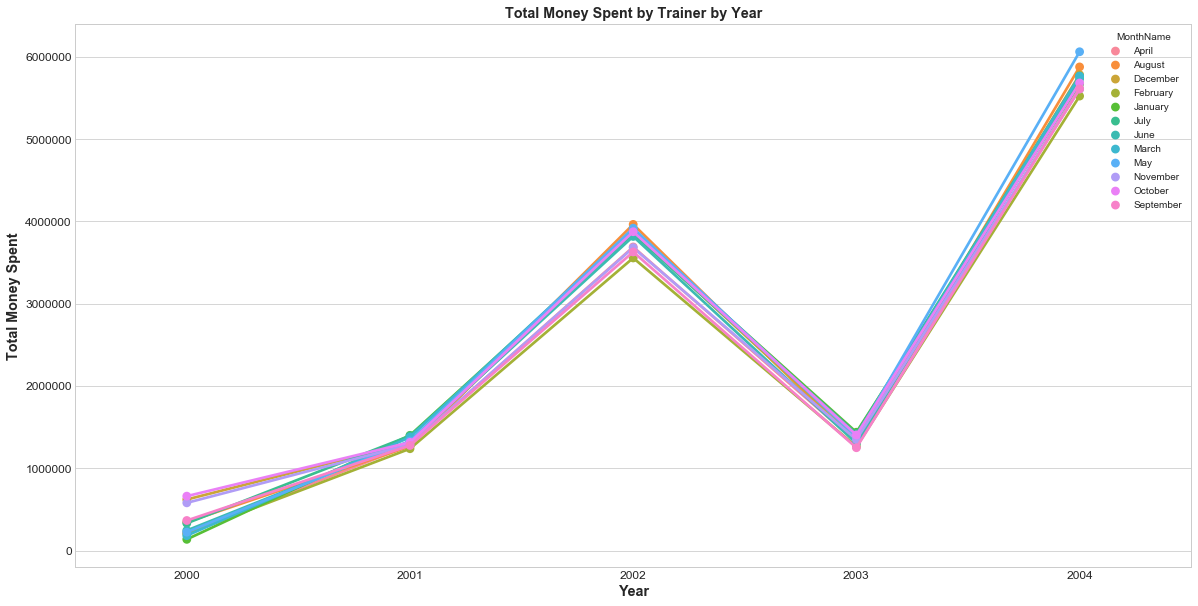

In [14]:
# Query for money spent per year by Trainer
df = pd.read_sql_query('''
SELECT
	Dates.MonthName,
	Dates.year,
	SUM(Items.item_price * qty) AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
GROUP BY Dates.year, Dates.MonthName
ORDER BY Dates.MonthName, Dates.year
''', conn)

# Line Graph of Month's Total Money Spent
plt.figure(figsize = (20, 10))
ax = sns.pointplot(x = "year", y = "Money Spent", hue = "MonthName",
                   data = df)

# Title, x-axis, y-axis
plt.title('Total Money Spent by Month by Year', size = 'x-large', fontweight = 'bold')
plt.xlabel('Year', size = 'x-large', fontweight = 'bold')
plt.ylabel('Total Money Spent', size = 'x-large', fontweight = 'bold')

# Ticks larger
plt.xticks(size = 'large')
plt.yticks(size = 'large')

(array([       0.,   500000.,  1000000.,  1500000.,  2000000.,  2500000.,
         3000000.,  3500000.,  4000000.,  4500000.]),
 <a list of 10 Text yticklabel objects>)

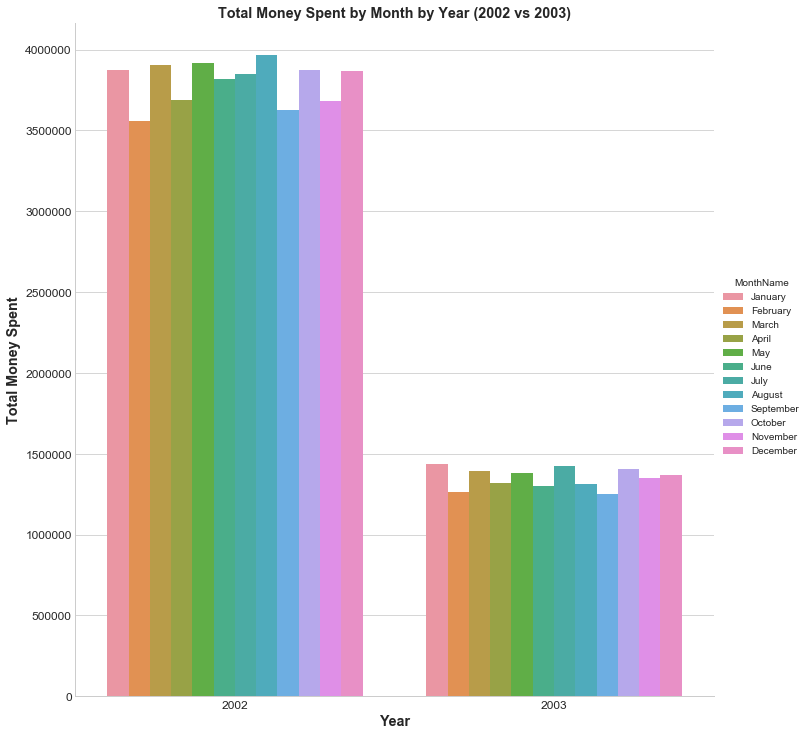

In [27]:
# Query for money spent per year by Trainer
df = pd.read_sql_query('''
SELECT
	Dates.month,
	Dates.MonthName,
	Dates.year,
	SUM(Items.item_price * qty) AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
WHERE Dates.year IN (2002, 2003)
GROUP BY Dates.year, Dates.MonthName, Dates.month
ORDER BY Dates.year, Dates.month
''', conn)

# Line Graph of Month's Total Money Spent
plt.figure(figsize = (20, 10))
sns.factorplot(x = 'year', y='Money Spent', hue = 'MonthName', data = df, kind = 'bar', size = 10)

# Title, x-axis, y-axis
plt.title('Total Money Spent by Month by Year (2002 vs 2003)', size = 'x-large', fontweight = 'bold')
plt.xlabel('Year', size = 'x-large', fontweight = 'bold')
plt.ylabel('Total Money Spent', size = 'x-large', fontweight = 'bold')

# Ticks larger
plt.xticks(size = 'large')
plt.yticks(size = 'large')

(array([       0.,  1000000.,  2000000.,  3000000.,  4000000.,  5000000.,
         6000000.,  7000000.]), <a list of 8 Text yticklabel objects>)

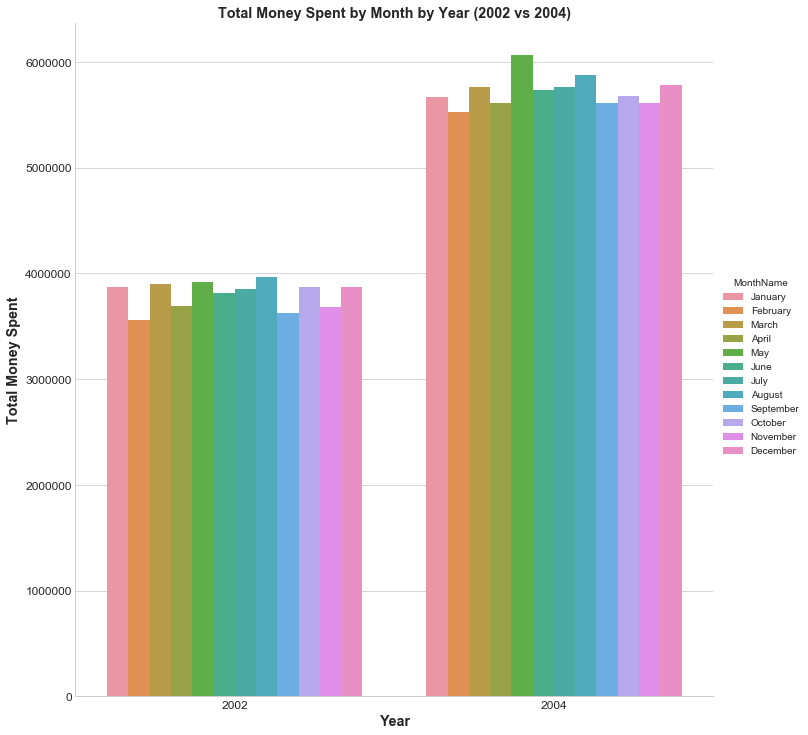

In [28]:
# Query for money spent by Month comparing two years
df = pd.read_sql_query('''
SELECT
	Dates.month,
	Dates.MonthName,
	Dates.year,
	SUM(Items.item_price * qty) AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
WHERE Dates.year IN (2002, 2004)
GROUP BY Dates.year, Dates.MonthName, Dates.month
ORDER BY Dates.year, Dates.month
''', conn)

# Line Graph of Month's Total Money Spent
plt.figure(figsize = (20, 10))
sns.factorplot(x = 'year', y='Money Spent', hue = 'MonthName', data = df, kind = 'bar', size = 10)

# Title, x-axis, y-axis
plt.title('Total Money Spent by Month by Year (2002 vs 2004)', size = 'x-large', fontweight = 'bold')
plt.xlabel('Year', size = 'x-large', fontweight = 'bold')
plt.ylabel('Total Money Spent', size = 'x-large', fontweight = 'bold')

# Ticks larger
plt.xticks(size = 'large')
plt.yticks(size = 'large')

(array([        0.,  10000000.,  20000000.,  30000000.,  40000000.,
         50000000.]), <a list of 6 Text yticklabel objects>)

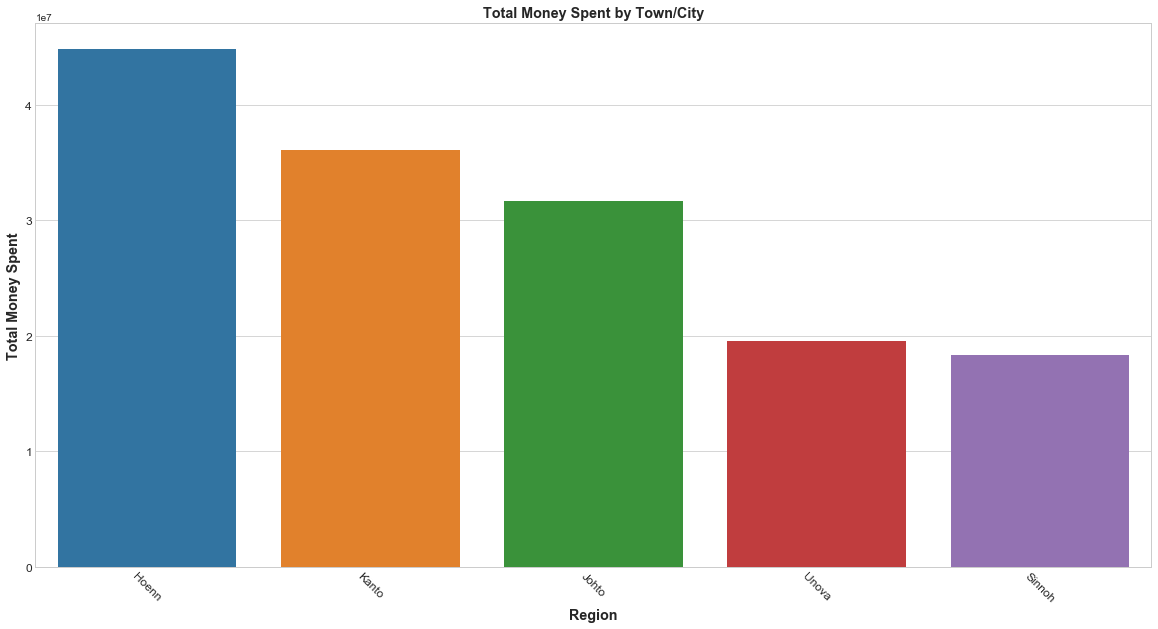

In [31]:
# Query by Region
df = pd.read_sql_query('''
SELECT
	Towns.town_region,
	SUM(Items.item_price * qty) AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [pokemon].[dbo].Dim_Flyers As Flyers
ON Orders.flyer_id = Flyers.flyer_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
GROUP BY Towns.town_region
ORDER BY [Money Spent] DESC
''', conn)

# Bar Graph of Sums using Seaborn/Matplotlib
plt.figure(figsize = (20, 10))
sns.barplot(x = 'town_region', y = 'Money Spent', data = df)

# Title, x-axis, y-axis
plt.title('Total Money Spent by Town/City', size = 'x-large', fontweight = 'bold')
plt.xlabel('Region', size = 'x-large', fontweight = 'bold')
plt.ylabel('Total Money Spent', size = 'x-large', fontweight = 'bold')

# Rotate x-axis ticks
plt.xticks(rotation = -45, size = 'large')
plt.yticks(size = 'large')

(array([        0.,   2500000.,   5000000.,   7500000.,  10000000.,
         12500000.,  15000000.,  17500000.,  20000000.,  22500000.]),
 <a list of 10 Text yticklabel objects>)

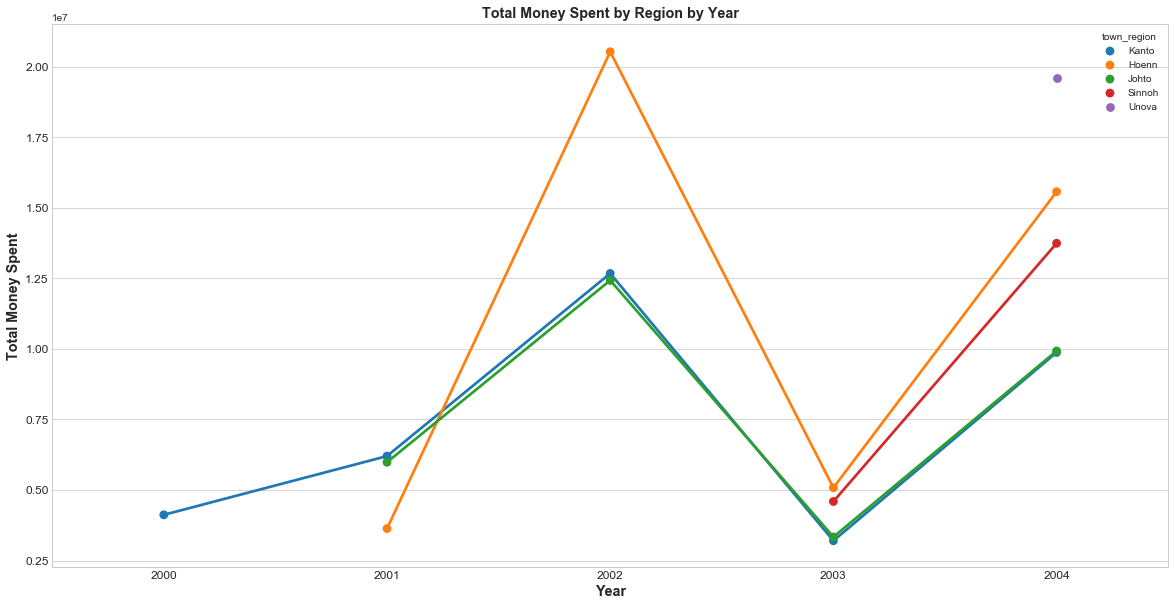

In [33]:
# Query for money spent by Region per Year
df = pd.read_sql_query('''
SELECT
	Towns.town_region,
	Dates.year,
	SUM(Items.item_price * qty) AS 'Money Spent'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
GROUP BY Dates.year, Towns.town_region
ORDER BY Dates.year, Towns.town_region
''', conn)

# Line Graph of Month's Total Money Spent
plt.figure(figsize = (20, 10))
ax = sns.pointplot(x = "year", y = "Money Spent", hue = "town_region",
                   data = df)

# Title, x-axis, y-axis
plt.title('Total Money Spent by Region by Year', size = 'x-large', fontweight = 'bold')
plt.xlabel('Year', size = 'x-large', fontweight = 'bold')
plt.ylabel('Total Money Spent', size = 'x-large', fontweight = 'bold')

# Ticks larger
plt.xticks(size = 'large')
plt.yticks(size = 'large')

(array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 6 Text yticklabel objects>)

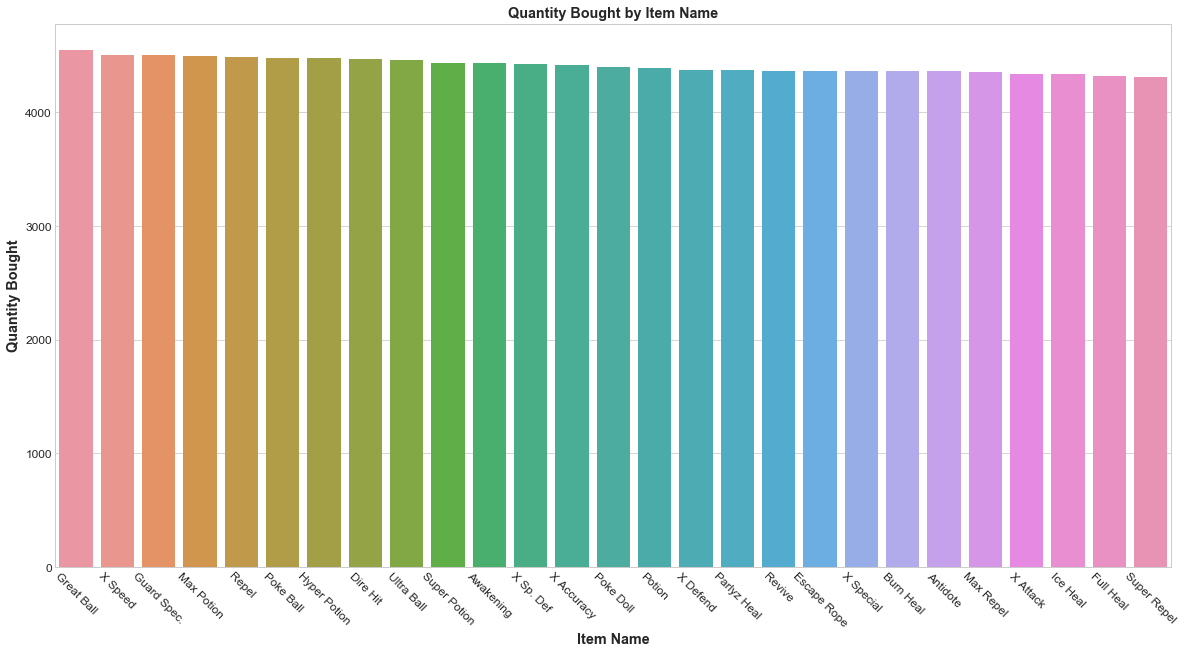

In [34]:
# Query by Quantity of Items
df = pd.read_sql_query('''
SELECT
	Items.item_name,
	COUNT(*) AS 'Quantity Bought'
FROM [Pokemon].[dbo].[Fct_Orders] AS Orders
INNER JOIN [Pokemon].[dbo].[Dim_Items] AS Items
ON Orders.item_id = Items.item_id
INNER JOIN [Pokemon].[dbo].[Dim_Trainers] AS Trainers
ON Orders.trainer_id = Trainers.trainer_id
INNER JOIN [Pokemon].[dbo].[Dim_Towns] AS Towns
ON Orders.town_id = Towns.town_id
INNER JOIN [pokemon].[dbo].Dim_Flyers As Flyers
ON Orders.flyer_id = Flyers.flyer_id
INNER JOIN [Pokemon].[dbo].[Dim_Dates] AS Dates
ON Orders.date_id = Dates.date_id
GROUP BY Items.item_name
ORDER BY [Quantity Bought] DESC
''', conn)


# Bar Graph
plt.figure(figsize = (20, 10))
sns.barplot(x = 'item_name', y = 'Quantity Bought', data = df)

# Title, x-axis, y-axis
plt.title('Quantity Bought by Item Name', size = 'x-large', fontweight = 'bold')
plt.xlabel('Item Name', size = 'x-large', fontweight = 'bold')
plt.ylabel('Quantity Bought', size = 'x-large', fontweight = 'bold')

# Rotate x-axis ticks
plt.xticks(rotation = -45, size = 'large')
plt.yticks(size = 'large')